In [14]:
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
def process_Loss_2(beta,Y,Z,lambda_):
    m,n,xx=Z.shape
    sum_loss=0
    for i in range(m):
        loss=beta.T@Z[i]@beta-Y[i]
        sum_loss=sum_loss+loss*loss
    
    
    sum_loss=sum_loss+lambda_*process_beta1_2(beta,n,lambda_)
    print(sum_loss)
    
    return sum_loss

In [16]:
def process_beta2(beta):
    
    loss=beta.T@beta
    loss=math.sqrt(loss)
    
    return loss

In [17]:
def get_betaloss(w_gu,beta,P):
    
    loss=0
    sum_loss=0
    for i in range(P):
        loss=(w_gu[i]-beta[i])
        sum_loss=sum_loss+loss*loss
    
    sum_loss=sum_loss
    print(sum_loss)
    return sum_loss

In [18]:
def process_beta1_2(beta,p,lambda_):
    sum_loss=0
    for i in range(p):
        loss=math.sqrt(abs(beta[i]))
        sum_loss=sum_loss+loss
    return sum_loss

In [19]:
def get_l1(a,b):
    sum=0
    for i in range(len(a)):
        sum+=abs(a[i]-b[i])
    return sum

In [20]:
def process_Loss(beta,X,Y,Z,lambda_):
    m,n=X.shape
    sum_loss=0
    for i in range(m):
        loss=beta.T@Z[i]@beta+X[i]@beta-Y[i]
        sum_loss=sum_loss+loss*loss
    
    
    sum_loss=sum_loss+lambda_*process_beta1_2(beta,n,lambda_)
    print(sum_loss)
    
    return sum_loss

In [21]:
def process_Z(n,p):
    
    matrix_dim = (n, p, p)
    Z=np.empty(matrix_dim)
    
    for i in range(n):
        z=np.random.randn(p,1)
        Z_i=z@z.T
        Z[i]=Z_i
    
    return Z

In [22]:
def process_beta(sparse,p):
    
    o2=np.zeros(p)
    index=np.random.choice(p,size=sparse,replace=False,p=None)
    
    random_number=[]
    for i in range (sparse):
        random_number.append(random.choice([1, -1]))
    random_number=np.array(random_number) 
    
    o2[index]=random_number
    
    return o2,index

In [23]:
def process_X(n,p):
    
    X=np.random.randn(n,p)
    
    
    return X

In [24]:
def process_Y(n,p,Z,X,beta):
    
    Random=np.random.normal(0,1,n)
    
    A_beta=(Z@beta+X)
    matrix_dim = (n, 1)
    Y=np.empty(matrix_dim)
    
    for i in range(n):
        y_i=beta.T@Z[i]@beta+X[i]@beta+Random[i]
        Y[i]=y_i
    
    return Y

In [25]:
def process_Y_pure(n,p,Z,beta):
    
    Random=np.random.normal(0,1,n)
    
    matrix_dim = (n, 1)
    Y=np.empty(matrix_dim)
    
    for i in range(n):
        y_i=beta.T@Z[i]@beta
        Y[i]=y_i
    
    return Y

In [26]:
def process_eig(Z,n):
    max_eig=0
    for i in range(n):
        eig, _ = np.linalg.eig(Z[i])
        max_eig = max(np.max(eig),max_eig)
        print(max_eig)
    return max_eig

In [27]:
def Generate_omega_k(beta,K,h):
    p=len(beta)
    w_k=np.empty((K,p))
    for k in range(K):
        random_number=[]
        for i in range (p):
            random_number.append(random.choice([1, -1]))
        random_number=np.array(random_number)
        w_k[k]=beta+(h/p)*1.0*random_number 
    return w_k

In [28]:
def Generate_omega_k_trans(beta,K,h,beta_indice):
    p=len(beta)
    s=len(beta_indice)
    m=np.arange(0, p, 1)
    
    
    
    w_k=np.empty((K,p))
    for k in range(K):
        index=np.random.choice(np.delete(m,beta_indice,axis=0),size=10,replace=False,p=None)
        random_number=[]
        for i in range (p):
            random_number.append(random.choice([1, -1]))
        random_number=np.array(random_number)
        w_k[k]=(2*h/p)*1.0*random_number
        print(beta_indice)
        for j in beta_indice:
            w_k[k][j]=beta[j]+(2*h/p)*1.0*random_number[j]
        print(index)
        for l in index:
            w_k[k][l]=random.choice([1, -1])+(2*h/p)*1.0*random_number[l]
    return w_k

In [29]:
def pool_set(tr_k,ori_r):
    pool_tr=tr_k
    print(pool_tr.shape)
    l_tr=ori_r
    print(l_tr.shape)
    s_t=np.append(pool_tr,l_tr,axis=0)
    print(s_t.shape)
    return s_t
    

In [30]:
def Generate_k_XZY(n,p,w):
    X=process_X(n,p)
    Z=process_Z(n,p)
    Y=process_Y(n,p,Z,X,w)
    return X,Z,Y

In [31]:
def Generate_ori_XZY(n,p,beta):
    X=process_X(n,p)
    Z=process_Z(n,p)
    Y=process_Y(n,p,Z,X,w)

In [32]:
def train_split(X,Y,Z,n):
    
    x,p=X.shape
    num_list = list(range(n*3))
    random.shuffle(num_list)
    loc=np.array(num_list)
    iloc=np.array_split(loc,3)
    tr_x=np.empty((3,n,p))
    tr_y=np.empty((3,n,1))
    tr_z=np.empty((3,n,p,p))
    for i in range(3):
        tr_x[i]=X[iloc[i]]
        tr_y[i]=Y[iloc[i]]
        tr_z[i]=Z[iloc[i]]

    return tr_x,tr_y,tr_z

In [33]:
def generate_source_k(beta,n,p,k):
    num=n
    sr_X=np.empty((k,num,p))
    sr_Z=np.empty((k,num,p,p))
    sr_Y=np.empty((k,num,1))
    for i in range(k):
        sr_X[i],sr_Z[i],sr_Y[i]=Generate_k_XZY(num,p,beta[i])
    return sr_X,sr_Z,sr_Y

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import math

def process_features(X):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]
    return X

class l12_IHTA:  
    def __init__(self, Lambda, maxIter=1000):
        self.lambda_ = Lambda
        self.maxIter = maxIter 
        
    def getphi(self,x,u):
        tem=pow(abs(x)/3.0,(-3.0/2))
        o=self.lambda_*u/8.0*tem
        return math.acos(o)
        
        
    def Getf(self,x,alpha):
        return 2/3*x*(1+math.cos(2/3*math.pi-2/3*self.getphi(x,alpha)))
    
        
    def soft_threshold(self,t, B_u,n):
            
        for i in range(n):
            
            s_1=(self.lambda_*t)
            s=pow(54,1/3)/4*pow(s_1,2/3)
            if abs(B_u[i])>s:
                B_u[i]=self.Getf(B_u[i],t)
    
            else :
                B_u[i]=0
                
        
        return B_u
        
    def fit(self, X, y,Z,alpha_):
        
        
        alpha=alpha_
        m,n = X.shape
        w = np.zeros(n)
        z = np.zeros(n)
        a=1
        for t in range(self.maxIter):
            sum_=0
            for i in range(m):
                s_1=z.T@Z[i]@z+X[i].T@z-y[i]
                s_2=Z[i]@z*2
                s_3=s_2+X[i]
                s_=s_1*s_3
                sum_=sum_+s_*2
            g=sum_/m
            
            r=z-alpha*g
            sw = w  
            #z=w-alpha*g
            
            w=self.soft_threshold(alpha, r,n)
            p = a
            
            a = (1+math.sqrt(1+4*p*p))/2
            z = w+(p-1)/a*(w-sw)
            
            w_loss=process_Loss(w,X,y,Z,self.lambda_)
           
        self.w=w
        
    def predict(self,X):
        return X@(self.w)
    
    def get(self):
        return self.w
    

C:\Users\shadow shang\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
class l12_IHTAbiasgai:  
    def __init__(self, Lambda, maxIter=1000):
        self.lambda_ = Lambda
        self.maxIter = maxIter 
        
    def getphi(self,x,u):
        tem=pow(abs(x)/3.0,(-3.0/2))
        o=self.lambda_*u/8.0*tem
        return math.acos(o)
        
        
    def Getf(self,x,alpha):
        return 2/3*x*(1+math.cos(2/3*math.pi-2/3*self.getphi(x,alpha)))
    
        
    def soft_threshold(self,t, B_u,n):
            
        for i in range(n):
            
            s_1=(self.lambda_*t)
            s=pow(54,1/3)/4*pow(s_1,2/3)
            if abs(B_u[i])>s:
                B_u[i]=self.Getf(B_u[i],t)
    
            else :
                B_u[i]=0
                
        
        return B_u
        
    def fit(self, X, y,Z,w_true,alpha_):
        
        
        alpha=alpha_
        m,n = X.shape
        w = w_true
        z = w_true
        a=1
        for t in range(self.maxIter):
            sum_=0
            for i in range(m):
                s_1=z.T@Z[i]@z+X[i].T@z-y[i]
                s_2=Z[i]@z*2
                s_3=s_2+X[i]
                s_=s_1*s_3
                sum_=sum_+s_*2
            g=sum_/m
            
            r=z-alpha*g
            sw = w  
            #z=w-alpha*g
            
            w=self.soft_threshold(alpha, r,n)
            p = a
            
            a = (1+math.sqrt(1+4*p*p))/2
            z = w+(p-1)/a*(w-sw)
            
            w_loss=process_Loss(w,X,y,Z,self.lambda_)
           
        self.w=w
        
    def predict(self,X):
        return X@(self.w)
    
    def get(self):
        return self.w

In [35]:
def bias_train(X,Y,Z,w_true,Lambda_,alpha_):
    
    #model = l12_IHTAbias(Lambda=0.001, maxIter=16)
    model = l12_IHTAbiasgai(Lambda=Lambda_, maxIter=300)
    model.fit(X, Y,Z,w_true,alpha_)
    sigma_true=model.get()
    #w_t=w_true+sigma_true
    w_t=sigma_true
    return w_t

In [36]:
def get_biasloss(w_t,beta):
    loss=0
    sum_loss=0
    for i in range(p):
        loss=(w_t[i]-beta[i])
        sum_loss=sum_loss+loss*loss
    
    sum_loss=sum_loss
    print(sum_loss)

In [37]:
n=100
p=600

sparse=10
beta,indice=process_beta(sparse,p)
X=process_X(n*3,p)
Z=process_Z(n*3,p)
Y=process_Y(n*3,p,Z,X,beta)
print(Y.shape)


(300, 1)


In [39]:
model = l12_IHTA(Lambda=0.056, maxIter=1000)
model.fit(X,Y,Z,1/50000)


[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704788]
[1835.3704

KeyboardInterrupt: 

In [ ]:
w_true=model.get()

In [224]:
loss=0
sum_loss=0
for i in range(p):
    loss=(w_true[i]-beta[i])
    sum_loss=sum_loss+loss*loss
    
sum_loss=sum_loss
print(sum_loss)

11.700262183639843


In [227]:
non_sum=np.count_nonzero(w_true)
print(non_sum)
indices = np.where(beta == -1)

print(w_true[indices])

295
[-0.19679193 -0.45033251 -0.51302357 -0.45916672]


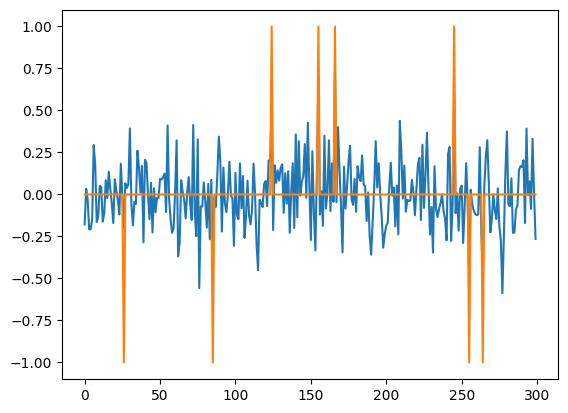

In [228]:
plt.plot(w_true)
plt.plot(beta)

In [37]:
def pool_train(X,Y,Z,num):
    X_p=X
    Y_p=Y
    Z_p=Z
    for i in range (num):
        X_p=pool_set(Source_k_X[i],X_p)
        Y_p=pool_set(Source_k_Y[i],Y_p)
        Z_p=pool_set(Source_k_Z[i],Z_p)
    return X_p,Y_p,Z_p

In [369]:
h=10
K=10
w_k=Generate_omega_k(beta,K,h)
Source_k_X,Source_k_Z,Source_k_Y=generate_source_k(w_k,50,p,K)

In [371]:
pool_num=K
X_p,Y_p,Z_p=pool_train(X,Y,Z,pool_num)

(50, 600)
(300, 600)
(350, 600)
(50, 1)
(300, 1)
(350, 1)
(50, 600, 600)
(300, 600, 600)
(350, 600, 600)
(50, 600)
(350, 600)
(400, 600)
(50, 1)
(350, 1)
(400, 1)
(50, 600, 600)
(350, 600, 600)
(400, 600, 600)
(50, 600)
(400, 600)
(450, 600)
(50, 1)
(400, 1)
(450, 1)
(50, 600, 600)
(400, 600, 600)
(450, 600, 600)
(50, 600)
(450, 600)
(500, 600)
(50, 1)
(450, 1)
(500, 1)
(50, 600, 600)
(450, 600, 600)
(500, 600, 600)
(50, 600)
(500, 600)
(550, 600)
(50, 1)
(500, 1)
(550, 1)
(50, 600, 600)
(500, 600, 600)
(550, 600, 600)
(50, 600)
(550, 600)
(600, 600)
(50, 1)
(550, 1)
(600, 1)
(50, 600, 600)
(550, 600, 600)
(600, 600, 600)
(50, 600)
(600, 600)
(650, 600)
(50, 1)
(600, 1)
(650, 1)
(50, 600, 600)
(600, 600, 600)
(650, 600, 600)
(50, 600)
(650, 600)
(700, 600)
(50, 1)
(650, 1)
(700, 1)
(50, 600, 600)
(650, 600, 600)
(700, 600, 600)
(50, 600)
(700, 600)
(750, 600)
(50, 1)
(700, 1)
(750, 1)
(50, 600, 600)
(700, 600, 600)
(750, 600, 600)
(50, 600)
(750, 600)
(800, 600)
(50, 1)
(750, 1)
(800, 

In [373]:
model = l12_IHTA(Lambda=0.1, maxIter=600)
model.fit(X_p, Y_p,Z_p,1/10000)
w_true1=model.get()

[210435.84511969]
[210434.19217499]
[210431.96774961]
[210429.16269991]
[210425.76165577]
[210421.74388045]
[210417.08352503]
[210411.74962718]
[210405.70596226]
[210398.91078919]
[210391.31650986]
[210382.86924976]
[210373.50836187]
[210363.16585227]
[210351.76572366]
[210339.22323098]
[210325.44404205]
[210310.32329445]
[210293.74453867]
[210275.57855594]
[210254.65166767]
[210230.62881046]
[210203.27089641]
[210172.32394068]
[210136.46388214]
[210095.16943416]
[210047.98055135]
[209994.38426713]
[209933.78565473]
[209865.49344091]
[209788.70880637]
[209702.5141007]
[209605.86030611]
[209496.51396725]
[209372.87205855]
[209233.26065968]
[209075.80717258]
[208898.39083677]
[208698.60514664]
[208473.72133847]
[208219.61480425]
[207931.47022493]
[207604.67550753]
[207233.02223493]
[206808.15822563]
[206320.1556604]
[205756.28955817]
[205103.51570016]
[204344.70747495]
[203461.78956675]
[202430.96747407]
[201216.48840923]
[199774.51874752]
[198056.19876362]
[195995.02295267]
[193507.1984

[1337.47790897]
[1337.72365071]
[1337.87492716]
[1337.9349891]
[1337.9111368]
[1338.10724577]
[1338.36242998]
[1338.71546226]
[1338.99972103]
[1339.20703278]
[1339.43404249]
[1339.55551761]
[1339.75854719]
[1339.92593679]
[1340.03385068]
[1340.1968271]
[1340.41590971]
[1340.69072216]
[1341.01950117]
[1341.3992809]
[1341.82626285]
[1342.29645752]
[1342.80691033]
[1343.35930359]
[1343.99157244]
[1344.57914045]
[1345.1111323]
[1345.58256687]
[1345.98870774]
[1346.32067296]
[1346.62209166]
[1347.04572673]
[1347.47825565]
[1348.07066278]
[1348.58481609]
[1349.02083242]
[1349.38379799]
[1349.6788739]
[1349.91195661]
[1350.08158074]
[1350.43276395]
[1350.88242441]
[1351.27015042]
[1351.58728964]
[1351.82544218]
[1351.97839167]
[1352.04238443]
[1352.01576556]
[1351.89678062]
[1351.60362342]
[1351.34056247]
[1351.08601052]
[1350.83538414]
[1350.58588469]
[1350.33613132]
[1350.08564367]
[1349.83458881]
[1349.58364401]
[1349.33391171]
[1349.08685637]
[1348.84424698]
[1348.60809651]
[1348.38059352

In [374]:
loss=0
sum_loss=0
for i in range(p):
    loss=(w_true1[i]-beta[i])
    sum_loss=sum_loss+loss*loss
    
sum_loss=sum_loss
print(sum_loss)


0.09076350762874028


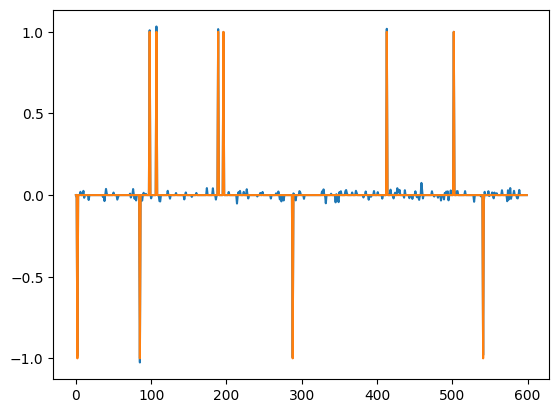

In [381]:
plt.plot(w_true1)
plt.plot(beta)

In [376]:
w_t=bias_train(X,Y,Z,w_true1,0.6,1/10000)


[332.1663771]
[330.09402361]
[327.50439486]
[324.45640744]
[321.00839165]
[317.21971846]
[313.15029835]
[308.85557463]
[304.41116855]
[300.05252555]
[295.68313817]
[291.28231139]
[286.80594736]
[282.58126754]
[278.51557238]
[274.74111838]
[271.44431106]
[268.61993565]
[266.57200663]
[264.73889413]
[262.90115459]
[261.18043527]
[259.27656484]
[257.54335451]
[255.78642518]
[254.94574641]
[254.76461377]
[255.46539621]
[256.54706637]
[257.53794962]
[258.13436907]
[258.69894501]
[259.68516444]
[260.47539758]
[260.26044145]
[261.17971714]
[261.76087621]
[261.94280761]
[262.85481859]
[265.65670802]
[268.71869482]
[271.90689853]
[276.16944011]
[280.79457957]
[285.12725967]
[288.17846742]
[290.98443923]
[293.57227839]
[296.10703592]
[298.99501104]
[303.07643798]
[306.61856323]
[309.86440164]
[312.5834604]
[314.57350172]
[314.75072525]
[313.94166162]
[313.39384222]
[312.86949619]
[312.60478071]
[312.884198]
[313.80453192]
[315.30599465]
[316.18107596]
[316.44558567]
[317.12281896]
[317.57772266]

In [377]:
get_biasloss(w_t,beta)

0.0006779625972150724


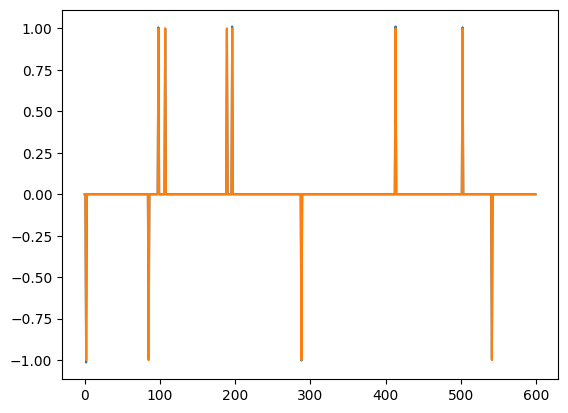

In [378]:
plt.plot(w_t)
plt.plot(beta)

In [380]:
non_sum=np.count_nonzero(w_t)
print(non_sum)
indices = np.where(beta == 1)
print(w_t[indices])

10
[1.0062152  0.99944459 0.99822716 1.01155436 1.01198477 1.00657948]
